<a id = "top"></a>
# Computational Methods Final Project
## Meghan Cilento and Mairead Heiger

### Project Overview

The purpose of this project is to explore orbital motion, specifically the initial conditions which produce different types of Keplarian orbits, as well as gravitational assists, and the trajectoy of Voyager 1. These three main parts build off of one another, as gravitational assists use a specific Keplarian orbit, a hyperbolic orbit, and Voyager 1 uses hyperbolic orbits as it completes gravitational assists in its path out of our solar system. 

The code to complete these three parts has been separated into sections with corresponding descriptions and final output figures.

- #### [Part 1](#part1): Orbital Motion
    - [Collision Orbit](#collision)
    - [Circular Orbit](#circ)
    - [Large Elliptical Orbit](#leps)
    - [Parabolic Orbit](#para)
    - [Hyperbolic Orbit](#hyp)
- #### [Part 2](#part2): Mock Gravity Assists
    - [Sample slingshot trajectories](#sampslingshots)
    - [Animations of gravity assists](#slinganimations)
    - [Make your own slingshot!](#slingwidget)
- #### [Part 3](#part3): Voyager 1 Trajectory
    - [Planetary orbits of Earth, Jupiter, Saturn](#solarsystem)
    - [Initial Positions of planets](#initpos)
    - [Trajectory animation](#trajan)
    - [Velocity over time](#vel)

In [1]:
# imports 

import numpy as np
from math import floor
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython import display

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

We use Runge-Kutta (RK4) because it is simple to code and less computationally demanding than implicit ODE methods like the trapezoid rule or leapfrog method that conserve energy well. Because the historical timescale of the Voyager gravity assists is less than one orbit of Jupiter, the energy loss due to the RK4 method is minimal.

In [2]:
# Runge-Kutta method used to generate all orbits
def RK4(f, x, t, h):
    """
    Given a function f(x,t) and
    scalars x, t, and h, return x(t+h)
    """
    
    k1 = h*f(x, t)
    k2 = h*f(x + (1/2)*k1, t + (1/2)*h)
    k3 = h*f(x + (1/2)*k2, t + (1/2)*h)
    k4 = h*f(x + k3, t + h)
    
    return x + (1/6)*(k1 + 2*k2 + 2*k3 + k4)


# Function called in Runge-Kutta method
def f(r, t):
    x, y, dxdt, dydt = r
    
    fx = -G*M*x / np.sqrt(x**2 + y**2)**3
    fy = -G*M*y / np.sqrt(x**2 + y**2)**3
    
    return np.array([dxdt, dydt, fx, fy])


# Constants
M = 1.9891e30
G = 6.6738e-11

<a id = "part1"></a>
## Part 1: Orbital Motion 

In order to generate the trajectory of Voyager 1, we knew that we needed to first animate the orbits of Earth, Jupiter and Saturn, as well as produce a hyperbolic, or slingshot, orbit. We therefore began this project by plotting and animating different possible Keplerian orbits to explore the initial conditions which produce such trajectories.

This notebook generates animations for the five different Keplerian orbits:

1. [Collision Orbit](#collision)
2. [Circular Orbit](#circ)
3. [Large Elliptical Orbit](#leps)
4. [Parabolic Orbit](#para)
5. [Hyperbolic Orbit](#hyp)

Theoretically, we can use any two orbiting bodies to generate these orbits, however, we used used Jupiter orbiting the sun. In the following examples, we set Jupiter at its perihelion location and gave it different initial tangential velocities to demonstrate how initial velocity affects final trajectory.

After the individual cases are animated, we created an interactive gui which uses intitial velocity as a slider. This allows you to see the progression of orbit type as velocity increases, and shows intermediate cases to those which have been selected for animation. 

The following equations provide the initial velocity constraints which determine the final path an object will take when it starts moving tangentially to another object. These equations were used to calculate the initial velocities which have been set in the following code. 

![Velocity Conditions](Velocity_conditions.png)

<a id="collision"></a><font size = 3>Collision Orbit Plot & Animation </font>

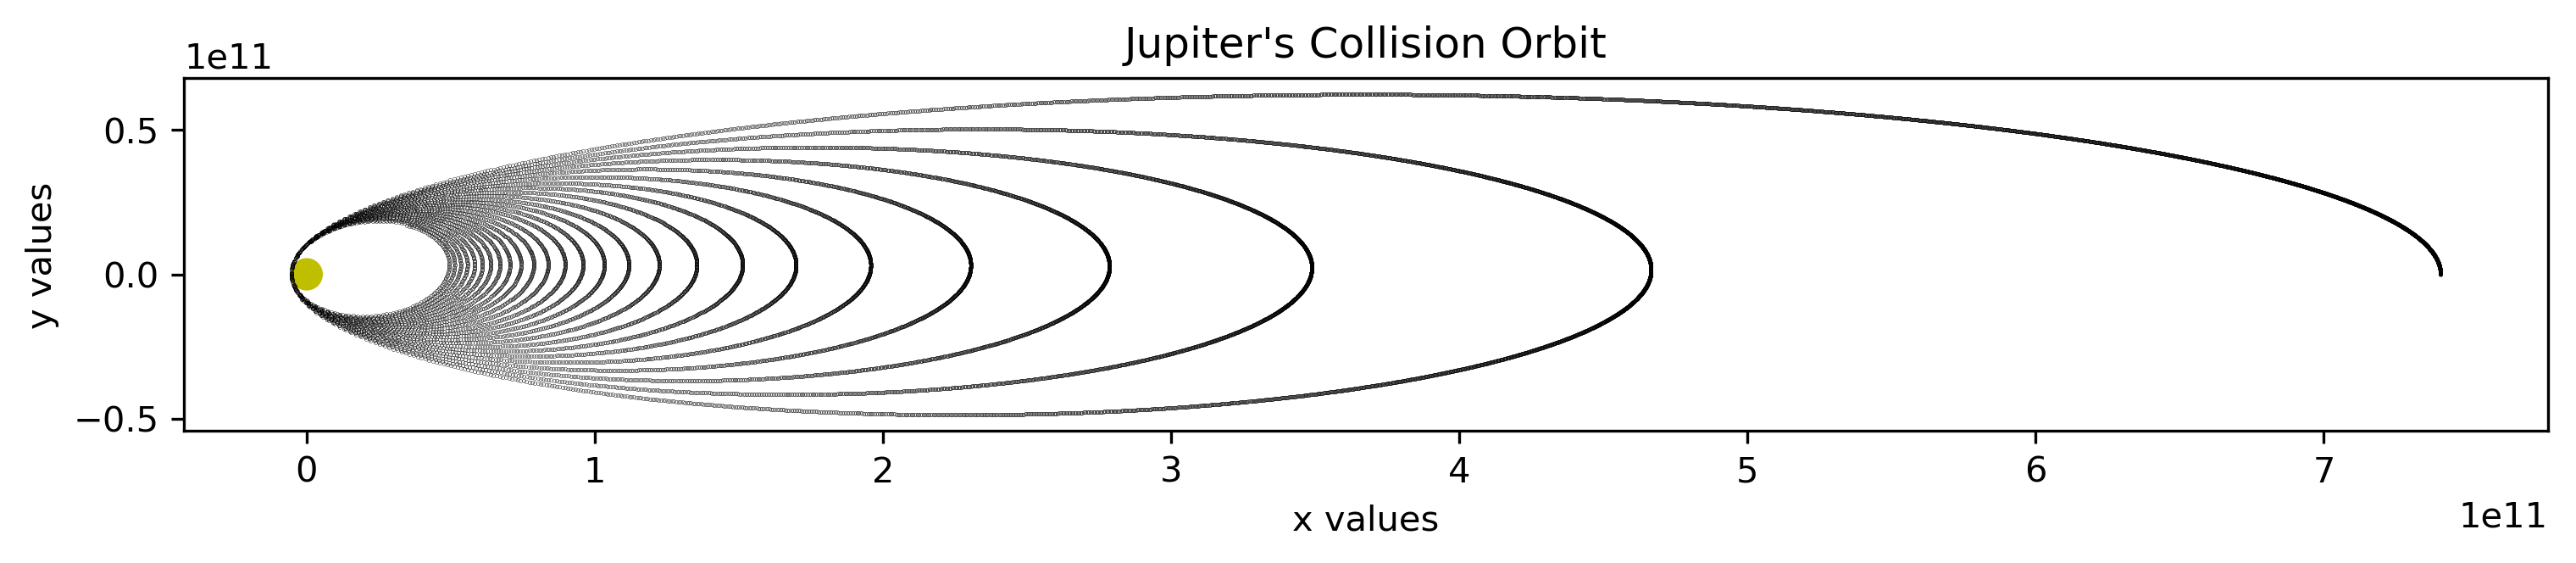

In [3]:
## Plot Jupiter's collision orbit with constant step size

# Initial Conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 1590


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(12, 10), dpi=300)

sun = plt.Circle((0, 0), 0.005e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.2)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Collision Orbit')
plt.show()

In [4]:
## Animate Jupiter's collision orbit with constant step size

fig = plt.figure(figsize=(12, 10), dpi=80)
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.ylim(-1e11, 1e11)
plt.axis("scaled")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Jupiter\'s Collision Orbit')

sun = plt.Circle((0, 0), 0.005e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    line1.set_data(x_values[frame*100], y_values[frame*100])
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

<a id="circ"></a><font size = 3>Circular Orbit Plot & Animation </font>

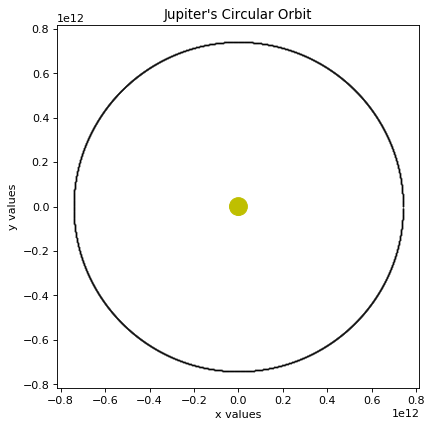

In [5]:
## Plot Jupiter's circular orbit with constant step size

# Initial conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 13395.28


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.1)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Circular Orbit')
plt.show()

In [6]:
## Animate Jupiter's circular orbit with constant step size

fig = plt.figure(figsize=(8, 8))
plt.xlim(-1e12, 1e12)
plt.ylim(-1e12, 1e12)
plt.xlabel('x values')
plt.ylabel('y values')
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.title('Jupiter\'s Circular Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    line1.set_data(x_values[frame*100], y_values[frame*100])
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

<a id="leps"></a><font size = 3>Large Elliptical Orbit Plot & Animation </font>

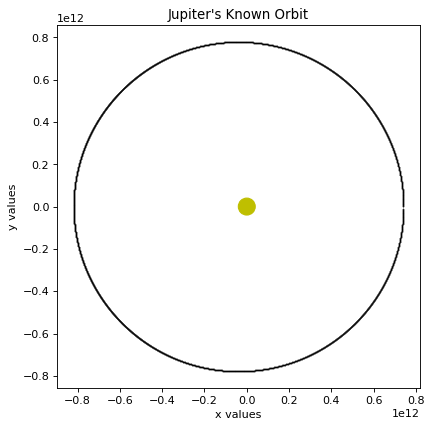

In [7]:
## Plot Jupiter's known orbit with constant step size

# Initial conditions
h = 20000
t_values = np.arange(0, 3.746e8+h, h)      
x, y, dxdt, dydt = 7.4052e11, 0, 0, 13720 


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.1)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Known Orbit')
plt.show()

In [8]:
## Animate Jupiter's known orbit with constant step size

fig = plt.figure(figsize=(8, 8))
plt.xlim(-1e12, 1e12)
plt.ylim(-1e12, 1e12)
plt.xlabel('x values')
plt.ylabel('y values')
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.title('Jupiter\'s Known Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    line1.set_data(x_values[frame*100], y_values[frame*100])
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

<a id="para"></a><font size = 3>Parabolic Orbit Plot & Animation </font>

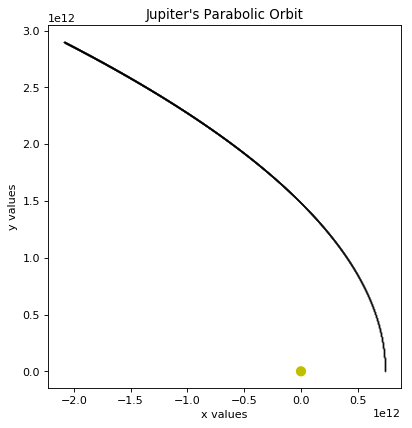

In [9]:
## Plot Jupiter's parabolic orbit with constant step size

# Initial Conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 18943.787


x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.055)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Parabolic Orbit')
plt.show()

In [10]:
## Animate Jupiter's parabolic orbit with constant step size

fig = plt.figure(figsize=(6, 6), dpi=80)
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.axis("scaled")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Jupiter\'s Parabolic Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    line1.set_data(x_values[frame*100], y_values[frame*100])
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

<a id="hyp"></a><font size = 3>Hyperbolic Orbit Plot & Animation </font>

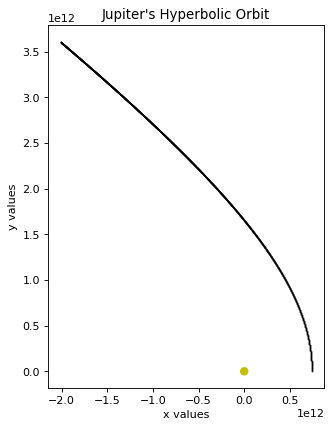

In [11]:
## Plot Jupiter's hyperbolic orbit with constant step size

#Initial Conditions
h = 20000
t_values = np.arange(0, 3.475e8+h, h)
x, y, dxdt, dydt = 7.4052e11, 0, 0, 20000 

x_values = []
y_values = []
for t in t_values:
    x_values.append(x)
    y_values.append(y)
    
    r = (x, y, dxdt, dydt)
    x, y, dxdt, dydt = RK4(f, r, t, h)


plt.figure(figsize=(6, 6), dpi=80)

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

plt.plot(x_values, y_values, 'k.', markersize=0.055)
plt.xlabel('x values')
plt.ylabel('y values')
plt.axis('scaled')
plt.title('Jupiter\'s Hyperbolic Orbit')
plt.show()

In [12]:
# Animate Jupiter's hyperbolic orbit with constant step size

fig = plt.figure(figsize=(6, 6), dpi=80)
plt.plot(x_values, y_values, color='k', linewidth=1.0)
plt.axis("scaled")
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Jupiter\'s Hyperbolic Orbit')

sun = plt.Circle((0, 0), 0.04e12, color='y')
ax = plt.gca()
ax.add_artist(sun)

line1, = plt.plot([], 'o-', color = 'm', label = 'Jupiter')

plt.legend()

def animate(frame):
    line1.set_data(x_values[frame*100], y_values[frame*100])
    return line1

plt.close()
anim = FuncAnimation(fig, animate, frames = len(x_values)//100, interval = 20)
HTML(anim.to_html5_video())

<font size = 3> Interactive GUI to explore effects of initial velocity on trajectory. </font>

In [13]:
# Interactive gui which uses initial velocity as a slider

def variable_orbit(v0):

    #Initial Conditions
    h = 20000
    t_values = np.arange(0, 5e8+h, h)
    x, y, dxdt, dydt = 7.4052e11, 0, 0, v0
    
    x_values = []
    y_values = []
    for t in t_values:
        x_values.append(x)
        y_values.append(y)
        
        r = (x, y, dxdt, dydt)
        x, y, dxdt, dydt = RK4(f, r, t, h)
        
    fig = plt.figure(figsize=(12, 10), dpi=80)
    plt.plot(x_values, y_values, color='k', linewidth=1.0)
    plt.axis("scaled")
    plt.xlabel('x values')
    plt.ylabel('y values')
    
    if v0 < 13395.00:
        plt.title('Keplarian Orbit: Collision/ Small Elliptical Orbit')
        
    if v0 == 13395.00:
        plt.title('Keplarian Orbit: Circular Orbit')
        
    if 13395.28 < v0 < 18944.00:
        plt.title('Keplarian Orbit: Large Elliptical Orbit')
        
    if v0 == 18944.00:
        plt.title('Keplarian Orbit: Parabolic Orbit')
    
    if v0 > 18944.00:
        plt.title('Keplarian Orbit: Hyperbolic Orbit')

    sun = plt.Circle((0, 0), 0.04e12, color='y')
    ax = plt.gca()
    ax.add_artist(sun)
    plt.show()

v0_slider = widgets.FloatSlider(min=1700, max=20000, continuous_update=False, value=13720, step=0.5)

gui = widgets.interactive(variable_orbit, v0=v0_slider)
display.display(gui)

interactive(children=(FloatSlider(value=13720.0, continuous_update=False, description='v0', max=20000.0, min=1…

<font size = '3'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<a id = "part2"></a>
### Part  2: Gravitational Assists

<font size = 3>A gravity assist (also called a slingshot) is a spacecraft maneuver that uses the relative motion between a planet and a spacecraft to accelerate the spacecraft. Gravity assists are most commonly used to change the direction or velocity of a spacecraft without using fuel. These maneuvers can be approximated as elastic collisions, in which the spacecraft "bounces" off the planet like one billiard ball bouncing off another. Because the planet is so massive compared to the spacecraft, the spacecraft can gain energy and accelerate while the planet loses a negligable amount of energy. </font>

The code uses a second order ODE that describes the motion of a satellite or probe in the presence of the planet, which we approximate as moving in a straight line at constant velocity (this is done more rigorously later). Here, we use mock units. For example, an initial velocity might be three units per second, and the planet is 80 mass units / G, where G is the gravitational constant. These units allowed us to explore gravity assists without worrying about the huge distance scale on which gravity assists actually occur. 

- [Sample slingshot trajectories](#sampslingshots)
- [Animations](#slinganimations)
- [Make your own slingshot!](#slingwidget)

In [16]:
# slingshot code (the user can input the initial positions and velocities of the planet and the probe)

def slingshot(xp0, yp0, vpx, vpy, x0, y0, dxdt0, dydt0):
    # initial conditions and constants
    Mp = 80
    G = 1
    h = 0.01 # time step
    t_values = np.arange(0, 8, h) # we take 800 steps over 8 seconds
    xp, yp = xp0, yp0
    x, y = x0, y0
    dxdt, dydt = dxdt0, dydt0
    
    def f(r, t):
        x, y, dxdt, dydt = r
        
        # force of planet on probe
        
        fx = -G*Mp*(x - xp) / np.sqrt((x - xp)**2 + (y - yp)**2)**3
        fy = -G*Mp*(y - yp) / np.sqrt((x - xp)**2 + (y - yp)**2)**3
        
        return np.array([dxdt, dydt, fx, fy])
    
    sat_x = []
    sat_y = []
    
    x_p = []
    y_p = []
    
    # Runge-Kutta method
    for t in t_values:
        sat_x.append(x)
        sat_y.append(y)
        x_p.append(xp)
        y_p.append(yp)
        
        xp = xp0 + vpx*t
        yp = yp0 + vpy*t
        
        r = (x, y, dxdt, dydt)
        x, y, dxdt, dydt = RK4(f, r, t, h)
    
    return sat_x, sat_y, x_p, y_p        # returns lists of the positions over time of the planet and probe

<a id = "sampslingshots"></a>

<font size = 3>Some sample slingshots</font>

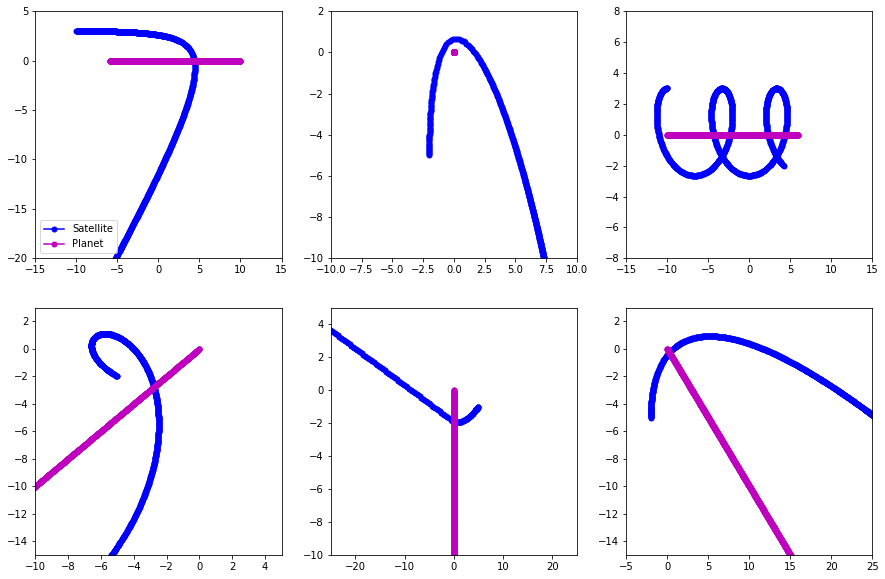

In [17]:
# calculate slingshot trajectories
sat_x1, sat_y1, x_1, y_1 = slingshot(-10, 0, 2, 0, -10, 3, -3, 0)
sat_x2, sat_y2, x_2, y_2 = slingshot(10, 0, -2, 0, -10, 3, 3, 0)
sat_x3, sat_y3, x_3, y_3 = slingshot(0, 0, 0, 0, -2, -5, 0, 5)
sat_x4, sat_y4, x_4, y_4 = slingshot(0, 0, -2, -2, -5, -2, -3, 2)
sat_x5, sat_y5, x_5, y_5 = slingshot(0, 0, 0, -3, 5, -1, -5, -2)
sat_x6, sat_y6, x_6, y_6 = slingshot(0, 0, 2, -2, -2, -5, 0, 3)


# plot the slingshots

fig = plt.figure(figsize = (15, 10))

plt.subplot(2, 3, 1)
plt.plot(sat_x2, sat_y2, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_2, y_2, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-15, 15)
plt.ylim(-20, 5)
plt.legend(loc = 'lower left')

plt.subplot(2, 3, 2)
plt.plot(sat_x3, sat_y3, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_3, y_3, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-10, 15)
plt.ylim(-4, 8)
plt.xlim(-10, 10)
plt.ylim(-10, 2)

plt.subplot(2, 3, 3)
plt.plot(sat_x1, sat_y1, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_1, y_1, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-15, 15)
plt.ylim(-8, 8)

plt.subplot(2, 3, 4)
plt.plot(sat_x4, sat_y4, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_4, y_4, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-10, 5)
plt.ylim(-15, 3)


plt.subplot(2, 3, 5)
plt.plot(sat_x5, sat_y5, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_5, y_5, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-25, 25)
plt.ylim(-10, 5)

plt.subplot(2, 3, 6)
plt.plot(sat_x6, sat_y6, 'b.-', markersize = 10, label = 'Satellite')
plt.plot(x_6, y_6, 'm.-', markersize = 10, label = 'Planet')
plt.xlim(-5, 25)
plt.ylim(-15, 3)

plt.show()

<a id = "slinganimations"></a>
<font size = 3>Animations of the slingshot trajectories</font>

In [20]:
# animate the slingshots

fig = plt.figure(figsize = (12, 8))
fig.subplots_adjust(left=0, bottom=0.1, right=0.99, top=0.99, wspace=None, hspace=None)

plt.subplot(2, 3, 1)
line1, = plt.plot([], 's', color = 'c', markersize = 2)
line2, = plt.plot([], 'o', color = 'c', markersize = 9, label = 'planet')
line3, = plt.plot([], '-', color = 'm')
line4, = plt.plot([], 's', color = 'm', label = 'satellite')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.legend(loc = "lower left")
plt.xlim(-15, 15)
plt.ylim(-20, 5)

plt.subplot(2, 3, 2)
line9, = plt.plot([], 's', color = 'c', markersize = 2)
line10, = plt.plot([], 'o', color = 'c', markersize = 9)
line11, = plt.plot([], '-', color = 'm')
line12, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-10, 10)
plt.ylim(-10, 2)

plt.subplot(2, 3, 3)
line5, = plt.plot([], 's', color = 'c', markersize = 2)
line6, = plt.plot([], 'o', color = 'c', markersize = 9)
line7, = plt.plot([], '-', color = 'm')
line8, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-15, 15)
plt.ylim(-8, 8)

plt.subplot(2, 3, 4)
line13, = plt.plot([], 's', color = 'c', markersize = 2)
line14, = plt.plot([], 'o', color = 'c', markersize = 9)
line15, = plt.plot([], '-', color = 'm')
line16, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-10, 5)
plt.ylim(-15, 3)

plt.subplot(2, 3, 5)
line17, = plt.plot([], 's', color = 'c', markersize = 2)
line18, = plt.plot([], 'o', color = 'c', markersize = 9)
line19, = plt.plot([], '-', color = 'm')
line20, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-25, 25)
plt.ylim(-10, 5)

plt.subplot(2, 3, 6)
line21, = plt.plot([], 's', color = 'c', markersize = 2)
line22, = plt.plot([], 'o', color = 'c', markersize = 9)
line23, = plt.plot([], '-', color = 'm')
line24, = plt.plot([], 's', color = 'm')
plt.tick_params(axis='both', which='both', left = False, bottom=False, top=False, labelleft = False, labelbottom=False)
plt.xlim(-5, 25)
plt.ylim(-15, 3)


def animate(frame):
    
    line1.set_data(x_1[:frame *2], y_1[:frame *2])
    line2.set_data(x_1[frame *2], y_1[frame *2])
    line3.set_data(sat_x1[:frame *2], sat_y1[:frame *2])
    line4.set_data(sat_x1[frame *2], sat_y1[frame *2])
    
    line5.set_data(x_2[:frame *2], y_2[:frame *2])
    line6.set_data(x_2[frame *2], y_2[frame *2])
    line7.set_data(sat_x2[:frame *2], sat_y2[:frame *2])
    line8.set_data(sat_x2[frame *2], sat_y2[frame *2])
    
    line9.set_data(x_3[:frame *2], y_3[:frame *2])
    line10.set_data(x_3[frame *2], y_3[frame *2])
    line11.set_data(sat_x3[:frame *2], sat_y3[:frame *2])
    line12.set_data(sat_x3[frame *2], sat_y3[frame *2])
    
    line13.set_data(x_4[:frame *2], y_4[:frame *2])
    line14.set_data(x_4[frame *2], y_4[frame *2])
    line15.set_data(sat_x4[:frame *2], sat_y4[:frame *2])
    line16.set_data(sat_x4[frame *2], sat_y4[frame *2])
    
    line17.set_data(x_5[:frame *2], y_5[:frame *2])
    line18.set_data(x_5[frame *2], y_5[frame *2])
    line19.set_data(sat_x5[:frame *2], sat_y5[:frame *2])
    line20.set_data(sat_x5[frame *2], sat_y5[frame *2])
    
    line21.set_data(x_6[:frame *2], y_6[:frame *2])
    line22.set_data(x_6[frame *2], y_6[frame *2])
    line23.set_data(sat_x6[:frame *2], sat_y6[:frame *2])
    line24.set_data(sat_x6[frame *2], sat_y6[frame *2])
    
    return line1, line2, line3, line4, line5, line6, line7, line8

anim = FuncAnimation(fig, animate, frames = len(x_1) // 3, interval = 20)
plt.close()
HTML(anim.to_html5_video())

<a id = "slingwidget"></a><font size = 3>Here, you can try to make your own gravity assist! Note that it can be difficult to get a successful assist. Most of the time, the slingshot will miss the planet entirely.</font>

The function `slingplot` uses `slingshot` to display a graph of the trajectory given user selected initial conditions.

In [21]:
# uses slingshot to plot trajectory for variable initial conditions

def slingplot(initial_x_position_planet, initial_y_position_planet, initial_x_velocity_planet, initial_y_velocity_planet, 
              initial_x_position_satellite, initial_y_position_satellite, initial_x_velocity_satellite, 
              initial_y_velocity_satellite):
    
    # initial conditions and constants
    xp0, yp0, vpx, vpy = initial_x_position_planet, initial_y_position_planet, initial_x_velocity_planet, initial_y_velocity_planet
    
    x0, y0, dxdt0, dydt0 = initial_x_position_satellite, initial_y_position_satellite, initial_x_velocity_satellite, initial_y_velocity_satellite
    
    # calculate trajectory
    xpl, ypl, xpr, ypro = slingshot(xp0, yp0, vpx, vpy, x0, y0, dxdt0, dydt0)
    
    # plot trajectory
    plt.plot(xpl, ypl, 'c-', label = 'planet')
    plt.plot(xpr, ypro, 'm-', label = 'satellite')

    plt.legend(loc = "lower left")
    plt.xlim(-20, 20)
    plt.ylim(-20, 20)

    plt.show()

# widgets
xp0_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value = 2, step = 1)
yp0_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value = 2, step = 1)
vpx_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value = 2, step = 1)
vpy_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value = 2, step = 1)

x0_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value = 5, step = 1)
y0_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value= 5, step = 1)
dydt0_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value = -5, step = 1)
dxdt0_slider = widgets.FloatSlider(min=-10, max=10, continuous_update = False, value = -5, step = 1)

gui = widgets.interactive(slingplot, initial_x_position_planet = xp0_slider, initial_y_position_planet = yp0_slider, 
                          initial_x_velocity_planet = vpx_slider, initial_y_velocity_planet = vpy_slider, 
                          initial_x_position_satellite = x0_slider, initial_y_position_satellite = y0_slider, 
                          initial_x_velocity_satellite = dxdt0_slider, initial_y_velocity_satellite = dydt0_slider)

In [22]:
display.display(gui)

interactive(children=(FloatSlider(value=2.0, continuous_update=False, description='initial_x_position_planet',…

<a id = "part3"></a>

### Part 3: Voyager 1 Trajectory

<font size = 3>Voyager 1 does two gravity assists, first around Jupiter and then around Saturn, before exiting the solar system. Both assists are to gain speed and to change direction. The actual, historical trajectory of Voyager 1 (and 2) is pictured below:

![Voyager 1](https://qph.fs.quoracdn.net/main-qimg-cd6e62f8ca9f89d87ecdb0f372056673)

We first calculated the position and velocity of Earth, Jupiter, and Saturn at every point in their orbit, and then modified the initial conditions (positions of planets) on the day of the launch to calculate Voyager's trajectory given those initial conditions.</font>

Because gravity assists are highly dependent on the initial positions of the planets, we were unable to replicate the exact trajectory of Voyager 1. However, our "Voyager 1" does complete flybys of both Jupiter and Saturn, with an additional flyby of Earth! With the correct initial positions of the planets (for which we would need accurate historical data), our Voyager 1 could have completed the historical trajectory.

The difficulty we had here speaks to the difficulty of gravity assists in general--rarely do planets align well enough to complete even simple gravity assists like Voyager 1, much less several like Voyager 2. More commonly, more complicated trajectories are necessary (like those of [Galileo](https://en.wikipedia.org/wiki/Gravity_assist#/media/File:Animation_of_Galileo_trajectory.gif) or [Rosetta](https://en.wikipedia.org/wiki/Gravity_assist#/media/File:Animation_of_Rosetta_trajectory.gif)).

<a id = "solarsystem"></a> 
<font size = 3> Here, we calculated and plotted the known orbits of Earth, Jupiter, and Saturn about Sun (without Voyager 1)</font>

In [28]:
# Plot known orbits of planets

# masses, orbital radius at perihelion, and tangential velocity of planets
Msun = 1.9891e30
Mjup, Rjup, Vjup = 1.89e27, 778e9, 13.07e3
Msat, Rsat, Vsat = 5.683e26, 1.4e12, 9.6e3
Mear, Rear, Vear = 5.972e24, 149.6e9, 30e3

# to find known orbits, we don't need to calculate the movements of the probe
Mpro, Rpro, Vpro = 0, 0, 0
np.seterr(all = 'ignore') # (doing so raises a runtime error, so we supress it)

def f(r, t):
    xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp = r
    
    # forces on Earth (Sun, Jupiter, Saturn)
    fxe = -G*Msun*xe / np.sqrt(xe**2 + ye**2)**3 + -G*Mjup*(xe - xj) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(xe - xs) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    fye = -G*Msun*ye / np.sqrt(xe**2 + ye**2)**3 + -G*Mjup*(ye - yj) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(ye - xs) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    
    # forces on Jupiter (Sun, Earth, Saturn)
    fxj = -G*Msun*xj / np.sqrt(xj**2 + yj**2)**3 + -G*Mear*(xj - xe) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(xj - xs) / np.sqrt((xj - xs)**2 + (yj - ys)**2)**3
    fyj = -G*Msun*yj / np.sqrt(xj**2 + yj**2)**3 + -G*Mear*(yj - ye) / np.sqrt((xe - xj)**2 + (ye - yj)**2)**3 + -G*Msat*(yj - ys) / np.sqrt((xj - xs)**2 + (yj - ys)**2)**3
  
    # forces on Saturn (Sun, Earth, Jupiter)
    fxs = -G*Msun*xs / np.sqrt(xs**2 + ys**2)**3 + -G*Mjup*(xs - xj) / np.sqrt((xs - xj)**2 + (ys - yj)**2)**3 + -G*Mear*(xs - xe) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    fys = -G*Msun*ys / np.sqrt(xs**2 + ys**2)**3 + -G*Mjup*(ys - yj) / np.sqrt((xs - xj)**2 + (ys - yj)**2)**3 + -G*Mear*(ys - ye) / np.sqrt((xe - xs)**2 + (ye - ys)**2)**3
    
    # forces on Voyager (Sun, Earth, Jupiter, Saturn)
    fxp = -G*Msun*xp / np.sqrt(xp**2 + yp**2)**3 + -G*Mjup*(xp - xj) / np.sqrt((xp - xj)**2 + (yp - yj)**2)**3 + -G*Mear*(xp - xe) / np.sqrt((xp - xe)**2 + (yp - ye)**2)**3 + -G*Msat*(xp - xs) / np.sqrt((xp - xs)**2 + (yp - ys)**2)**3
    fyp = -G*Msun*yp / np.sqrt(xp**2 + yp**2)**3 + -G*Mjup*(yp - yj) / np.sqrt((xp - xj)**2 + (yp - yj)**2)**3 + -G*Mear*(yp - ye) / np.sqrt((xp - xe)**2 + (yp - ye)**2)**3 + -G*Msat*(yp - ys) / np.sqrt((xp - xs)**2 + (yp - ys)**2)**3
    
    return np.array([dxdte, dydte, fxe, fye, dxdtj, dydtj, fxj, fyj, dxdts, dydts, fxs, fys, dxdtp, dydtp, fxp, fyp])

h = 86400 # one day
t_values = np.arange(0, 9.2896e8 + h, h) # one complete orbit of saturn

# initial conditions (planets at perihelion with initial velocity tangential)
xe, ye, dxdte, dydte = 0, Rear, -Vear, 0
xj, yj, dxdtj, dydtj = 0, Rjup, -Vjup, 0
xs, ys, dxdts, dydts = 0, Rsat, -Vsat, 0
xp, yp, dxdtp, dydtp = 0, Rpro, 0, Vpro

# positions and velocities
ear_x = []
ear_y = []
jup_x = []
jup_y = []
sat_x = []
sat_y = []

vex = []
vey = []
vjx = []
vjy = []
vsx = []
vsy = []

progress = display.ProgressBar(len(t_values))
progress.display()

# Runge-Kutta method
for t in t_values:
    ear_x.append(xe)
    ear_y.append(ye)
    vex.append(dxdte)
    vey.append(dydte)
    
    jup_x.append(xj)
    jup_y.append(yj)
    vjx.append(dxdtj)
    vjy.append(dydtj)
    
    sat_x.append(xs)
    sat_y.append(ys)
    vsx.append(dxdts)
    vsy.append(dydts)
    
    progress.progress += 1
    
    r = (xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp)
    xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp = RK4(f, r, t, h)

# animation of planetary motion 

fig = plt.figure(figsize = (10, 10))

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')
plt.plot(xe, ye, 'b-', markersize = 10)
plt.plot(xj, yj, 'g-', markersize = 10)
plt.plot(xs, ys, 'r-', markersize = 10)

line1, = plt.plot([], 'bo', markersize = 8, label = 'Earth')
line2, = plt.plot([], 'go', markersize = 8, label = 'Jupiter')
line3, = plt.plot([], 'ro', markersize = 8, label = 'Saturn')

plt.xlim(-1.7e12, 1.7e12); plt.ylim(-1.7e12, 1.7e12)
plt.legend(loc = 'lower left')

progress = display.ProgressBar(len(t_values))
progress.display()

def animate(frame):
    
    line1.set_data(ear_x[frame*20], ear_y[frame*20])
    line2.set_data(jup_x[frame*20], jup_y[frame*20])
    line3.set_data(sat_x[frame*20], sat_y[frame*20])
    
    progress.progress += 20
    
    return line1, line2, line3
    
anim = FuncAnimation(fig, animate, frames = len(ear_x) // 20, interval = 20)
plt.close()
HTML(anim.to_html5_video())

[============================================================] 10753/10753

[=========================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] 5380/537

<a id = "initpos"></a><font size = 3>We set different initial positions (with corresponding velocities) so that the planets align favorably for a gravity assist, as they did in 1977 when Voyager 1 launched. We calculated the trajectory, plotted it, and animated it.</font>

In [24]:
# calculate the position of the planets and of Voyager probe, as well as Voyager's velocity

# new initial positions of planets and probe
ear_initx, ear_inity = ear_x[int(len(ear_x)//2.5)], ear_y[int(len(ear_y)//2.5)]   # position of earth
veix, veiy = vex[int(len(ear_x)//2.5)], vey[int(len(ear_x)//2.5)]                 # velocity of earth
jup_initx, jup_inity = jup_x[int(0.70*len(jup_x))], jup_y[int(0.70*len(jup_x))]   # position of jupiter
vjix, vjiy = vjx[int(0.70*len(jup_x))], vjy[int(0.70*len(jup_x))]                 # velocity of jupiter
sat_initx, sat_inity = sat_x[int(len(sat_x)*0.88)], sat_y[int(len(sat_x)*0.88)]   # position of saturn
vsix, vsiy = vsx[int(len(sat_x)*0.88)], vsy[int(len(sat_x)*0.88)]                 # velocity of saturn
Mpro, Rpro, Vpro = 721.9, 6371e3, 40e3                                   # mass, initial position and velocity of probe

# set initial conditions for planets and Voyager
xe, ye, dxdte, dydte = ear_initx, ear_inity, veix, veiy
xj, yj, dxdtj, dydtj = jup_initx, jup_inity, vjix, vjiy
xs, ys, dxdts, dydts = sat_initx, sat_inity, vsix, vsiy
xp, yp, dxdtp, dydtp = ear_initx + Rpro*1e3, ear_inity, Vpro, 0

ear_x1 = []
ear_y1 = []
jup_x1 = []
jup_y1 = []
sat_x1 = []
sat_y1 = []
pro_x1 = []
pro_y1 = []

vpx1 = []
vpy1 = []

h = 86400 # one day
t_values = np.arange(0, 9.2896e8*1.5 + h, h) # we run this a little longer to see the complete trajectory

progress = display.ProgressBar(len(t_values))
progress.display()

for t in t_values:
    ear_x1.append(xe)
    ear_y1.append(ye)
    
    jup_x1.append(xj)
    jup_y1.append(yj)
    
    sat_x1.append(xs)
    sat_y1.append(ys)
    
    pro_x1.append(xp)
    pro_y1.append(yp)
    vpx1.append(dxdtp)
    vpy1.append(dydtp)
    
    progress.progress += 1
    
    r = (xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp)
    xe, ye, dxdte, dydte, xj, yj, dxdtj, dydtj, xs, ys, dxdts, dydts, xp, yp, dxdtp, dydtp = RK4(f, r, t, h)

[============================================================] 16129/16129

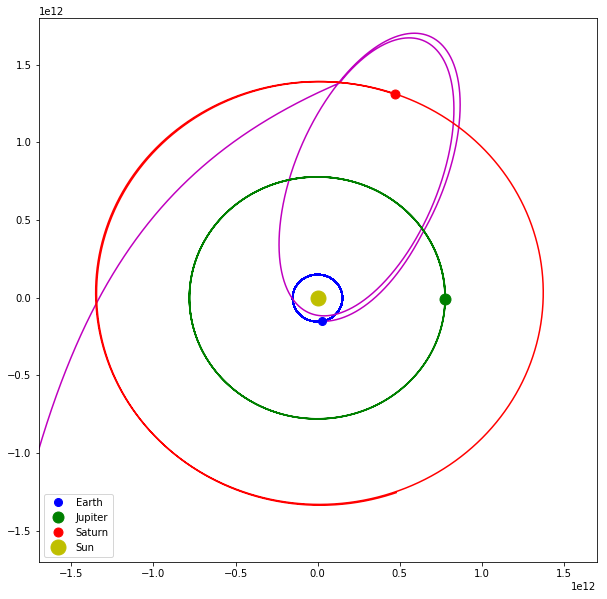

In [25]:
# plot trajectory and initial positions of planets and Voyager

plt.figure(figsize = (10, 10))
plt.plot(ear_x1, ear_y1, 'b-', markersize = 10)
plt.plot(pro_x1, pro_y1, 'm-', markersize = 10)
plt.plot(jup_x1, jup_y1, 'g-', markersize = 7)
plt.plot(sat_x1, sat_y1, 'r-', markersize = 10)

plt.plot(ear_x[int(len(ear_x)//2.5)], ear_y[int(len(ear_x)//2.5)], 'bo', markersize = 8, label = 'Earth')
plt.plot(jup_x[int(0.705*len(jup_x))], jup_y[int(0.705*len(jup_x))], 'go', markersize = 11, label = 'Jupiter')
plt.plot(sat_x[int(len(sat_x)*0.88)], sat_y[int(len(sat_x)*0.88)], 'ro', markersize = 9, label = 'Saturn')

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')
plt.xlim(-1.7e12, 1.7e12); plt.ylim(-1.7e12, 1.8e12)
plt.legend(loc = 'lower left')
plt.show()

<a id = "trajan"></a>

In [26]:
# animation of planetary motion and Voyager trajectory

fig = plt.figure(figsize = (10, 10))

plt.plot(0, 0, 'yo', markersize = 15, label = 'Sun')

line1, = plt.plot([], 'bo', markersize = 8, label = 'Earth')
line2, = plt.plot([], 'go', markersize = 8, label = 'Jupiter')
line3, = plt.plot([], 'ro', markersize = 8, label = 'Saturn')
line4, = plt.plot([], 'm*', markersize = 8, label = 'Probe')

plt.xlim(-1.7e12, 1.7e12); plt.ylim(-1.7e12, 1.95e12)
plt.legend(loc = 'lower left')

progress = display.ProgressBar(len(ear_x1))
progress.display()

def animate(frame):
    
    line1.set_data(ear_x1[frame*20], ear_y1[frame*20])
    line2.set_data(jup_x1[frame*20], jup_y1[frame*20])
    line3.set_data(sat_x1[frame*20], sat_y1[frame*20])
    line4.set_data(pro_x1[frame*20], pro_y1[frame*20])
    
    progress.progress += 20
    
    return line1, line2, line3, line4
    
anim = FuncAnimation(fig, animate, frames = len(ear_x1) // 20, interval = 20)
plt.close()
HTML(anim.to_html5_video())

[============================================================] 16140/16129

<a id = "vel"></a><font size = 3>We also plotted Voyager's velocity as a function of time and as a function of distance from the sun. The gravity assists are noted.</font>

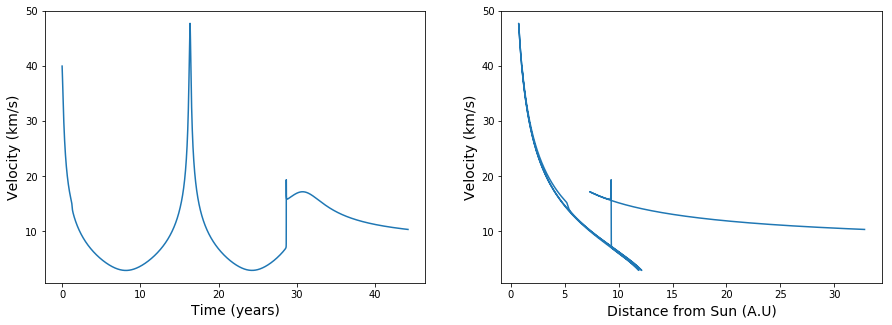

In [27]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(t_values / 86400 / 365, np.sqrt(np.asarray(vpx1)**2 + np.asarray(vpy1)**2)/1000)
plt.ylabel("Velocity (km/s)", fontsize = 14); plt.xlabel("Time (years)", fontsize = 14)

plt.subplot(1, 2, 2)
plt.plot(np.sqrt(np.asarray(pro_x1)**2 + np.asarray(pro_y1)**2)*6.68459e-12, np.sqrt(np.asarray(vpx1)**2 + np.asarray(vpy1)**2)/1000)
plt.ylabel("Velocity (km/s)", fontsize = 14); plt.xlabel("Distance from Sun (A.U)", fontsize = 14)

plt.show()

<font size = '3'>*<a href = '#top' style="text-decoration:none"> Return to top ↑ </a>*</font>

<font size = 3.5>Questions, comments, or problems? Contact mvc24@pitt.edu for Part 1, and meh187@pitt.edu for Parts 2 and 3.</font>